In [1]:
import numpy as np
from matplotlib import pyplot as plt
import spectrum

In [39]:
gain = 10.**(62*0.1) #  62 dB
freq, y, yerr = spectrum.create_spectrum(
        chi  = 1.e-10,
        T_noise = 100,
        gain = gain,
        time = 24., # sec
        freq_0 = 20.e+9, # [Hz] peak position
        freq_binwidth = 3.e+3, # [Hz] frequency bin width
        rebin = 15,
        A_eff= 17*1.e-2, # [m^2]
        freq_half_scale = 0.5, # freq_0*scale = freq span/2.
        doPlot=False);

chi     = 1e-10
A_eff   = 1700.0000000000002 [cm^2]
gain    = +62.000000 [dB]
T_noise = 100 [K]
d_nu    = 3.0 [kHz]
P_DP    = 8.648429519355715e-12 [W] (After *gain)
Noise   = 3.459818264601301e-14 [W] (After *gain)
Noise floor  = 6.564543603834735e-12 [W] (After *gain)
freq_center [10.000001 10.000004 10.000007 ... 29.999993 29.999996 29.999999]
power [6.58718354e-12 6.63273036e-12 6.57742434e-12 ... 6.62096963e-12
 6.56683174e-12 6.56206814e-12]


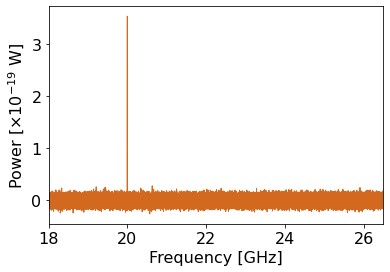

In [41]:
ymean = np.mean(y)
plt.plot(freq*1e-9, (y-ymean)*1e+19/gain, linewidth=1, color='chocolate')
plt.xlim(18.,26.5)
plt.tick_params(labelsize=16)
plt.xlabel('Frequency [GHz]', fontsize=16)
plt.ylabel(r'Power [$ \times 10^{-19}~\mathrm{W}$]', fontsize=16)
plt.savefig('figure/spectrum.pdf')